In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load the dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalize the data (pixel values range from 0 to 255; we scale to 0-1)
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape the data for the CNN (adding a channel dimension)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Print data shapes
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 7us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 50s 2us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 3us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 5s 1us/step
Training data shape: (60000, 28, 28, 1)
Testing data shape: (10000, 28, 28, 1)


In [5]:
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", 
    "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

In [7]:
# Build the CNN Model
model = Sequential([
    # Convolutional Layer 1
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),

    # Convolutional Layer 2
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Flatten layer
    Flatten(),

    # Dense layer 1
    Dense(128, activation='relu'),

    # Dropout layer to prevent overfitting
    Dropout(0.5),

    # Dense layer 2 (Output layer)
    Dense(10, activation='softmax')  # 10 classes for classification
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

C:\Users\MATHSLAB 37\Videos\New folder\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.6757 - loss: 0.9010 - val_accuracy: 0.8462 - val_loss: 0.4108
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.8388 - loss: 0.4532 - val_accuracy: 0.8758 - val_loss: 0.3417
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.8645 - loss: 0.3816 - val_accuracy: 0.8826 - val_loss: 0.3182
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.8714 - loss: 0.3557 - val_accuracy: 0.8798 - val_loss: 0.3172
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.8821 - loss: 0.3225 - val_accuracy: 0.8953 - val_loss: 0.2851
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.8930 - loss: 0.2955 - val_accuracy: 0.8984 - val_loss: 0.2797
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.8984 - loss: 0.2840 - val_accuracy: 0.8993 - val_loss: 0.2713
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.9047 - loss: 0.2638 - 

In [11]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9043 - loss: 0.2644
Test Accuracy: 0.9039000272750854


In [13]:
# The test accuracy of 0.9039 (or approximately 90.39%) indicates that the trained CNN model correctly classified approximately 90.39% of the images in the test dataset.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


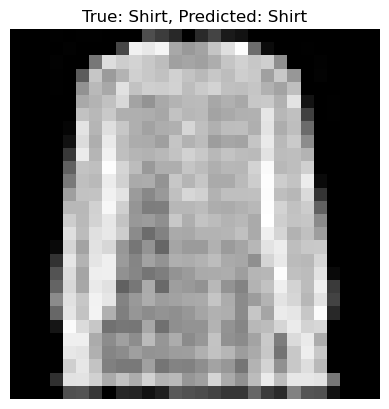

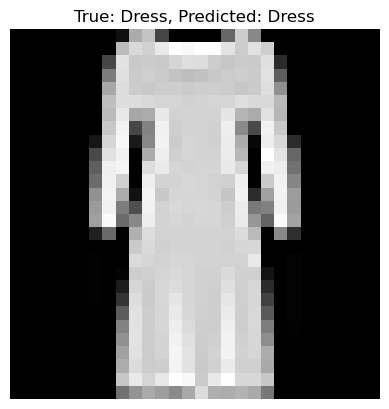

In [15]:
# Make Predictions
# Select two random test images
indices = np.random.choice(len(X_test), 2, replace=False)
selected_images = X_test[indices]
true_labels = y_test[indices]

# Predict
predictions = model.predict(selected_images)
predicted_classes = np.argmax(predictions, axis=1)

# Display the images and predictions
for i in range(2):
    plt.imshow(selected_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {class_names[true_labels[i]]}, Predicted: {class_names[predicted_classes[i]]}")
    plt.axis('off')
    plt.show()

In [17]:
# Save the model
model.save("fashion_mnist_cnn_model.h5")
print("Model saved as 'fashion_mnist_cnn_model.h5'")

Model saved as 'fashion_mnist_cnn_model.h5'


In [ ]:
import zipfile
import os

# Files to include
files_to_zip = ["Fashion MNIST Classification.R", "fashion_mnist_cnn_model.h5","", "README.md"]

# Create ZIP file
with zipfile.ZipFile("Fashion MNIST Classification.zip", "w") as zipf:
    for file in files_to_zip:
        zipf.write(file)

print("ZIP file created: Highridge_Assignment.zip")